# Which States have a high dependency on contracted nursing staff?

## Objective 

- Identify High-Potential States.


## Methodology 

- Calculate Contractor Dependency
- Aggregate by Region
- Identify High-Dependency Regions
- Highlight Opportunities


### Loading and merging the dataset

In [16]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# Load the cleaned PBJ dataset
df_cleaned = pd.read_csv('C:/Users/hp/Downloads/Cleaned_PBJ_Daily_Nurse_Staffing_Q1_2024.csv')

# Load the cleaned sn dataset
df_sn_cleaned = pd.read_csv('C:/Users/hp/Downloads/Cleaned_Skilled_Nursing_Facility_Quality_Reporting_Program_Provider_Data_Aug2024.csv')



C:\Users\hp\AppData\Local\Temp\ipykernel_3084\2151673877.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('C:/Users/hp/Downloads/Cleaned_PBJ_Daily_Nurse_Staffing_Q1_2024.csv')
C:\Users\hp\AppData\Local\Temp\ipykernel_3084\2151673877.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sn_cleaned = pd.read_csv('C:/Users/hp/Downloads/Cleaned_Skilled_Nursing_Facility_Quality_Reporting_Program_Provider_Data_Aug2024.csv')


### Calculate the proportion of contractor hours versus employee hours for each facility.

In [7]:
# Sum of all contractor hours
df_cleaned['total_contractor_hours'] = (
    df_cleaned['Hrs_RNDON_ctr'] + df_cleaned['Hrs_RNadmin_ctr'] +
    df_cleaned['Hrs_RN_ctr'] + df_cleaned['Hrs_LPNadmin_ctr'] +
    df_cleaned['Hrs_LPN_ctr'] + df_cleaned['Hrs_CNA_ctr'] +
    df_cleaned['Hrs_NAtrn_ctr'] + df_cleaned['Hrs_MedAide_ctr']
)

# Sum of all employee hours
df_cleaned['total_employee_hours'] = (
    df_cleaned['Hrs_RNDON_emp'] + df_cleaned['Hrs_RNadmin_emp'] +
    df_cleaned['Hrs_RN_emp'] + df_cleaned['Hrs_LPNadmin_emp'] +
    df_cleaned['Hrs_LPN_emp'] + df_cleaned['Hrs_CNA_emp'] +
    df_cleaned['Hrs_NAtrn_emp'] + df_cleaned['Hrs_MedAide_emp']
)

# Calculate the contractor ratio
df_cleaned['contractor_ratio'] = df_cleaned['total_contractor_hours'] / (
    df_cleaned['total_contractor_hours'] + df_cleaned['total_employee_hours']
)

# Display summary statistics for the contractor ratio
df_cleaned['contractor_ratio']


0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1330961    0.0
1330962    0.0
1330963    0.0
1330964    0.0
1330965    0.0
Name: contractor_ratio, Length: 1330966, dtype: float64

### Aggregate by State

In [12]:
# Group by state and calculate the average contractor ratio
state_contractor_dependency = df_cleaned.groupby('STATE')['contractor_ratio'].mean().reset_index()

# Rename columns for clarity
state_contractor_dependency.columns = ['State', 'Average_Contractor_Dependency']

# Display the results
print(state_contractor_dependency)


   State  Average_Contractor_Dependency
0     AK                       0.127360
1     AL                       0.014706
2     AR                       0.023596
3     AZ                       0.059827
4     CA                       0.036552
5     CO                       0.096458
6     CT                       0.056332
7     DC                       0.060655
8     DE                       0.115206
9     FL                       0.027363
10    GA                       0.066617
11    HI                       0.083438
12    IA                       0.068156
13    ID                       0.039796
14    IL                       0.074209
15    IN                       0.033340
16    KS                       0.065274
17    KY                       0.054596
18    LA                       0.048417
19    MA                       0.103313
20    MD                       0.108991
21    ME                       0.174177
22    MI                       0.032851
23    MN                       0.096009


### Identify High-Dependency Regions

- Calculate the National Average Contractor Dependency

In [13]:
# Calculate the national average contractor dependency
national_average = state_contractor_dependency['Average_Contractor_Dependency'].mean()


- Define threshold and Identify high-dependency regions

In [14]:
# Define a threshold (e.g., 20% above the national average)
threshold = national_average * 1.20

# Identify high-dependency regions
high_dependency_regions = state_contractor_dependency[state_contractor_dependency['Average_Contractor_Dependency'] > threshold]

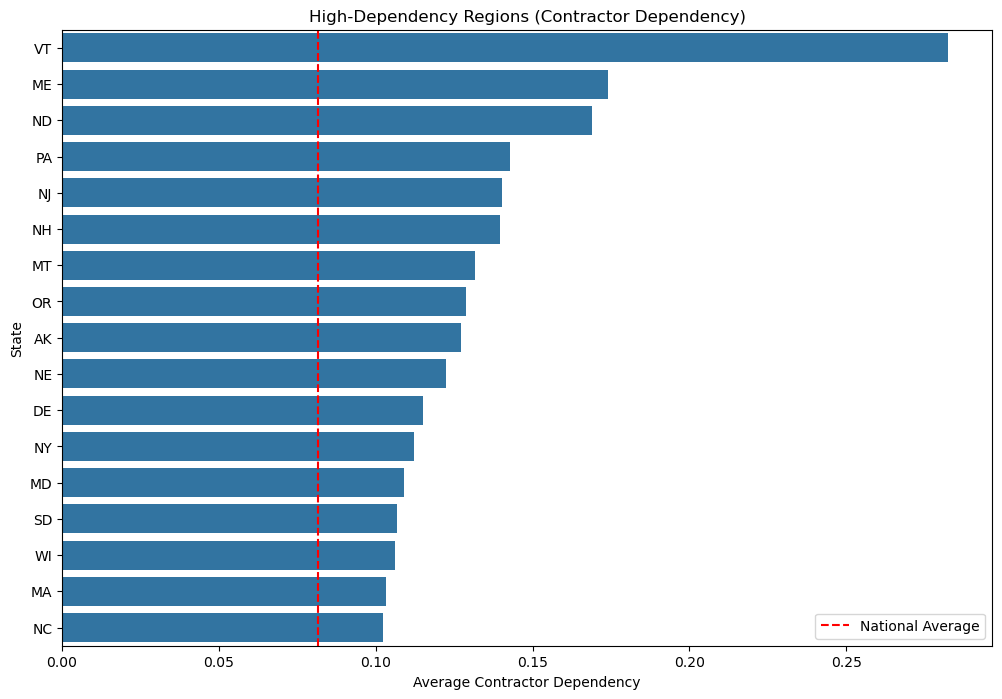

In [15]:
# Sort the high_dependency_regions DataFrame by 'Average_Contractor_Dependency' in descending order
high_dependency_regions_sorted = high_dependency_regions.sort_values(by='Average_Contractor_Dependency', ascending=False)

# Create a bar plot of high-dependency regions
plt.figure(figsize=(12, 8))
sns.barplot(x='Average_Contractor_Dependency', y='State', data=high_dependency_regions_sorted, errorbar=None)

# Add a vertical line for the national average
plt.axvline(x=national_average, color='red', linestyle='--', label='National Average')

plt.title('High-Dependency Regions (Contractor Dependency)')
plt.xlabel('Average Contractor Dependency')
plt.ylabel('State')
plt.legend()
plt.show()

